Loading data ...

Please load the file ex1data2.txt...



Saving ex1data2.txt to ex1data2.txt

First 10 examples from the dataset: 

x = [2104.    3.] , y= [399900.]
x = [1600.    3.] , y= [329900.]
x = [2400.    3.] , y= [369000.]
x = [1416.    2.] , y= [232000.]
x = [3000.    4.] , y= [539900.]
x = [1985.    4.] , y= [299900.]
x = [1534.    3.] , y= [314900.]
x = [1427.    3.] , y= [198999.]
x = [1380.    3.] , y= [212000.]
x = [1494.    3.] , y= [242500.]
Program paused. Press enter to continue.

Normalizing Features ...

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]

Running gradient descent ...

Theta computed from gradient descent: 

[[340412.65957447]
 [109447.79646961]
 [ -6578.35485416]]


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ [293081.46433491]
Program paused. Press enter to continue.

Solving with normal equations...

Theta computed from the normal equations: 

[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


Predicted price of a 16

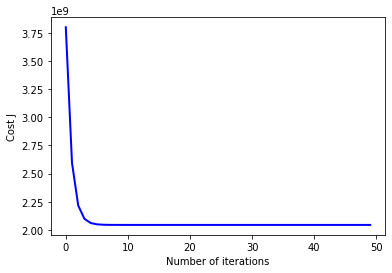

In [1]:
## Machine Learning Online Class
#  Exercise 1: Linear regression with multiple variables
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear regression exercise. 
#
#  You will need to complete the following functions in this 
#  exericse:
#
#     warmUpExercise.m
#     plotData.m
#     gradientDescent.m
#     computeCost.m
#     gradientDescentMulti.m
#     computeCostMulti.m
#     featureNormalize.m
#     normalEqn.m
#
#  For this part of the exercise, you will need to change some
#  parts of the code below for various experiments (e.g., changing
#  learning rates).
#

## Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def featureNormalize(X):
#   FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

# You need to set these values correctly
  X_norm = X.copy()
  mu = np.zeros((X.shape[1]))
  sigma = np.zeros((X.shape[1]))
 

# ====================== YOUR CODE HERE ======================
# Instructions: First, for each feature dimension, compute the mean
#               of the feature and subtract it from the dataset,
#               storing the mean value in mu. Next, compute the 
#               standard deviation of each feature and divide
#               each feature by it's standard deviation, storing
#               the standard deviation in sigma. 
#
#               Note that X is a matrix where each column is a 
#               feature and each row is an example. You need 
#               to perform the normalization separately for 
#               each feature. 
#
# Hint: You might find the 'mean' and 'std' functions useful.
#       

  mu = np.mean(X,axis = 0)
  sigma = np.std(X, axis = 0)
  #X_norm = (X - mu)./sigma; octave
  X_norm = (X - mu)/sigma
  print('Computed mean:', mu)
  print('Computed standard deviation:', sigma)
  return X_norm,mu,sigma
#============================================================



def gradientDescentMulti(X, y, theta, alpha, num_iters):
#   GRADIENTDESCENTMULTI Performs gradient descent to learn theta
#   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
  m = y.size; # number of training examples
  J_history = np.zeros((num_iters, 1))

  for iter in range (num_iters):
    

    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCostMulti) and gradient here.
    #
    temp = np.dot(X,theta)-y;
    error = np.dot(X.transpose(), temp)
    theta-=((alpha/m) * error)
    
    # ============================================================

    # Save the cost J in every iteration    
    J_history[iter] = computeCostMulti(X, y, theta)
  return theta,J_history



def computeCostMulti(X, y, theta):
#COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
#   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y

# Initialize some useful values
  m = y.size; # number of training examples

# You need to return the following variables correctly 
  J = 0;

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta
#               You should set J to the cost.

  #J = ((1/(2*m))*sum(((X*theta) - y).^2));
  temp = np.dot(X,theta)-y;
  J = np.sum(np.power(temp,2))/(2*m);
  return J

# =========================================================================


def normalEqn(X, y):
#   NORMALEQN Computes the closed-form solution to linear regression 
#   NORMALEQN(X,y) computes the closed-form solution to linear 
#   regression using the normal equations.

  theta = np.zeros(X.shape[1])

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the code to compute the closed form solution
#               to linear regression and put the result in theta.
#

# ---------------------- Sample Solution ----------------------

# θ = 􏰀 pinv(X'*X) 􏰁* X'y 
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
# -------------------------------------------------------------

  return theta
# ============================================================




## ================ Part 1: Feature Normalization ================

## Clear and Close Figures
#clear ; close all; clc

print('Loading data ...\n')
print('Please load the file ex1data2.txt...\n');
## Load Data
from google.colab import files
path_to_file = list(files.upload().keys())[0]
data = np.loadtxt(path_to_file,delimiter=',',usecols=(0,1,2),unpack=True)
#The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon.
#The first column is the size of the house (in square feet), the second column is the number of bedrooms, 
#and the third column is the price of the house.

X = np.transpose(np.array(data[:-1]))
X_normalEqn = X.copy()#make a copy for Normal Eqn
y = np.transpose(np.array(data[-1:]))
y_normalEqn = y.copy()#make a copy for Normal Eqn
m = y.size # number of training examples


# Print out some data points
print('\nFirst 10 examples from the dataset: \n')
for i in range(10):
  print('x =',X[i],', y=',y[i])

print('Program paused. Press enter to continue.\n');
#pause;

# Scale features and set them to zero mean
print('Normalizing Features ...\n');
X,mu,sigma = featureNormalize(X);

# Add intercept term to X
#X = [ones(m, 1) X]; octave
X = np.insert(X,0,1,axis=1)

## ================ Part 2: Gradient Descent ================

# ====================== YOUR CODE HERE ======================
# Instructions: We have provided you with the following starter
#               code that runs gradient descent with a particular
#               learning rate (alpha). 
#
#               Your task is to first make sure that your functions - 
#               computeCost and gradientDescent already work with 
#               this starter code and support multiple variables.
#
#               After that, try running gradient descent with 
#               different values of alpha and see which one gives
#               you the best result.
#
#               Finally, you should complete the code at the end
#               to predict the price of a 1650 sq-ft, 3 br house.
#
# Hint: By using the 'hold on' command, you can plot multiple
#       graphs on the same figure.
#
# Hint: At prediction, make sure you do the same feature normalization.
#

print('\nRunning gradient descent ...\n');

# Choose some alpha value
alpha = 1;
num_iters = 50;


# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1));
theta,J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
fig = plt.figure();
plt.plot(np.arange(len(J_history)), J_history, '-b', linewidth =2);
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');

# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);
print('\n');

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

# You should change this
#price = 0 #in octave
predict_array = [1, 1650, 3]
predict_array[1:3] = (predict_array[1:3] - mu) / sigma
price = np.dot(predict_array, theta)   
# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $', price);
print('Program paused. Press enter to continue.\n');
#pause;

## ================ Part 3: Normal Equations ================

print('Solving with normal equations...\n');

# ====================== YOUR CODE HERE ======================
# Instructions: The following code computes the closed form 
#               solution for linear regression using the normal
#               equations. You should complete the code in 
#               normalEqn.m
#
#               After doing so, you should complete this code 
#               to predict the price of a 1650 sq-ft, 3 br house.
#

# Load Data
#use the saved copy of X and y for normalEqn

# Add intercept term to X
X_normalEqn = np.insert(X_normalEqn,0,1,axis =1)

# Calculate the parameters from the normal equation
theta = normalEqn(X_normalEqn, y_normalEqn)

# Display normal equation's result
print('Theta computed from the normal equations: \n');
print(theta);
print('\n');


# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
price = np.dot([1,1650,3],theta) # You should change this
# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $', price);
